In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load the Data

In [ ]:
# Load the dataset
df = pd.read_csv('Walmart Dataset.csv', encoding='latin1')

# Overview of the data
print(df.head(10))
print(df.tail(10))
print(df.info())
print(df.describe())
print(df.columns)
print(df.shape)
print(df.dtypes)
print(df.value_counts())
print("Category =", df['Category'].unique())
print("Ship Mode =", df['Ship Mode'].unique())
print("Segment =", df['Segment'].unique())
print("Region =", df['Region'].unique())
print("Sub-Category =", df['Sub-Category'].unique())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11/08/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  11/08/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688  06/12/2016  06/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812  06/09/2014  06/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812  06/09/2014  06/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812  06/09/2014  06/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812  06/09/2014  06/14/2014  Standard Class    BH-11710   
9      10  CA-2014-115812  06/09/2014  06/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

# Cleaning the data

In [ ]:
# Convert categorical columns to lowercase
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

# Check for and drop duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)
df.drop_duplicates(subset=df.columns.difference(['Order Date']), inplace=True)

# Check for missing values and drop rows with missing values
missing_values = df.isna().sum()
print("Missing values:",missing_values)
df.dropna(inplace=True)

# convert wrong data type for my data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Row ID'] = df['Row ID'].astype('object')

# Save the cleaned Data
df.to_csv('cleaned_data.csv', index=False)

# Apply mapping to convert categorical columns to numerical by using ordinal encoding
df['Ship Mode'] = df['Ship Mode'].map({'standard class': 1, 'second class': 2, 'first class': 3, 'same day': 4})
df['Segment'] = df['Segment'].map({'consumer': 1, 'corporate': 2, 'home office': 3})
df['Region'] = df['Region'].map({'central': 1, 'south': 2, 'east': 3, 'west': 4})
df['Category'] = df['Category'].map({'furniture': 1, 'technology': 2, 'office supplies': 3})
df['Sub-Category'] = df['Sub-Category'].map({
    'bookcases': 1, 'chairs': 2, 'labels': 3, 'tables': 4, 'storage': 5, 'furnishings': 6,
    'phones': 7, 'binders': 8, 'appliances': 9, 'paper': 10, 'art': 11, 'accessories': 12,
    'envelopes': 13, 'fasteners': 14, 'supplies': 15, 'machines': 16, 'copiers': 17
})

# Replace outliers using quartiles
def replace_outliers_with_quartiles(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        df[col] = np.where(df[col] < q1, q1, df[col])
        df[col] = np.where(df[col] > q3, q3, df[col])
    return df

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = replace_outliers_with_quartiles(df, numerical_columns)

df.reset_index(drop=True, inplace=True)

df.head(10)

Duplicate rows: 0
Missing values: Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ca-2016-152156,2016-11-08,2016-11-11,2.0,cg-12520,claire gute,1.0,united states,henderson,...,42420.0,2.0,fur-bo-10001798,2.0,6.0,bush somerset collection bookcase,209.970,2.0,0.0,29.364000
1,2,ca-2016-152156,2016-11-08,2016-11-11,2.0,cg-12520,claire gute,1.0,united states,henderson,...,42420.0,2.0,fur-ch-10000454,2.0,6.0,"hon deluxe fabric upholstered stacking chairs,...",209.970,3.0,0.0,29.364000
2,3,ca-2016-138688,2016-06-12,2016-06-16,2.0,dv-13045,darrin van huff,2.0,united states,los angeles,...,90008.0,4.0,off-la-10000240,3.0,6.0,self-adhesive address labels for typewriters b...,17.280,2.0,0.0,6.871400
3,4,us-2015-108966,2015-10-11,2015-10-18,1.0,so-20335,sean o'donnell,1.0,united states,fort lauderdale,...,33311.0,2.0,fur-ta-10000577,2.0,6.0,bretford cr4500 series slim rectangular table,209.970,5.0,0.2,1.712025
4,5,us-2015-108966,2015-10-11,2015-10-18,1.0,so-20335,sean o'donnell,1.0,united states,fort lauderdale,...,33311.0,2.0,off-st-10000760,3.0,6.0,eldon fold 'n roll cart system,22.368,2.0,0.2,2.516400
5,6,ca-2014-115812,2014-06-09,2014-06-14,1.0,bh-11710,brosina hoffman,1.0,united states,los angeles,...,90008.0,4.0,fur-fu-10001487,2.0,6.0,eldon expressions wood and plastic desk access...,48.860,5.0,0.0,14.169400
6,8,ca-2014-115812,2014-06-09,2014-06-14,1.0,bh-11710,brosina hoffman,1.0,united states,los angeles,...,90008.0,4.0,tec-ph-10002275,2.0,7.0,mitel 5320 ip phone voip phone,209.970,5.0,0.2,29.364000
7,9,ca-2014-115812,2014-06-09,2014-06-14,1.0,bh-11710,brosina hoffman,1.0,united states,los angeles,...,90008.0,4.0,off-bi-10003910,3.0,8.0,dxl angle-view binders with locking rings by s...,18.504,3.0,0.2,5.782500
8,10,ca-2014-115812,2014-06-09,2014-06-14,1.0,bh-11710,brosina hoffman,1.0,united states,los angeles,...,90008.0,4.0,off-ap-10002892,3.0,9.0,belkin f5c206vtel 6 outlet surge,114.900,5.0,0.0,29.364000
9,11,ca-2014-115812,2014-06-09,2014-06-14,1.0,bh-11710,brosina hoffman,1.0,united states,los angeles,...,90008.0,4.0,fur-ta-10001539,2.0,6.0,chromcraft rectangular conference tables,209.970,5.0,0.2,29.364000


# Select features

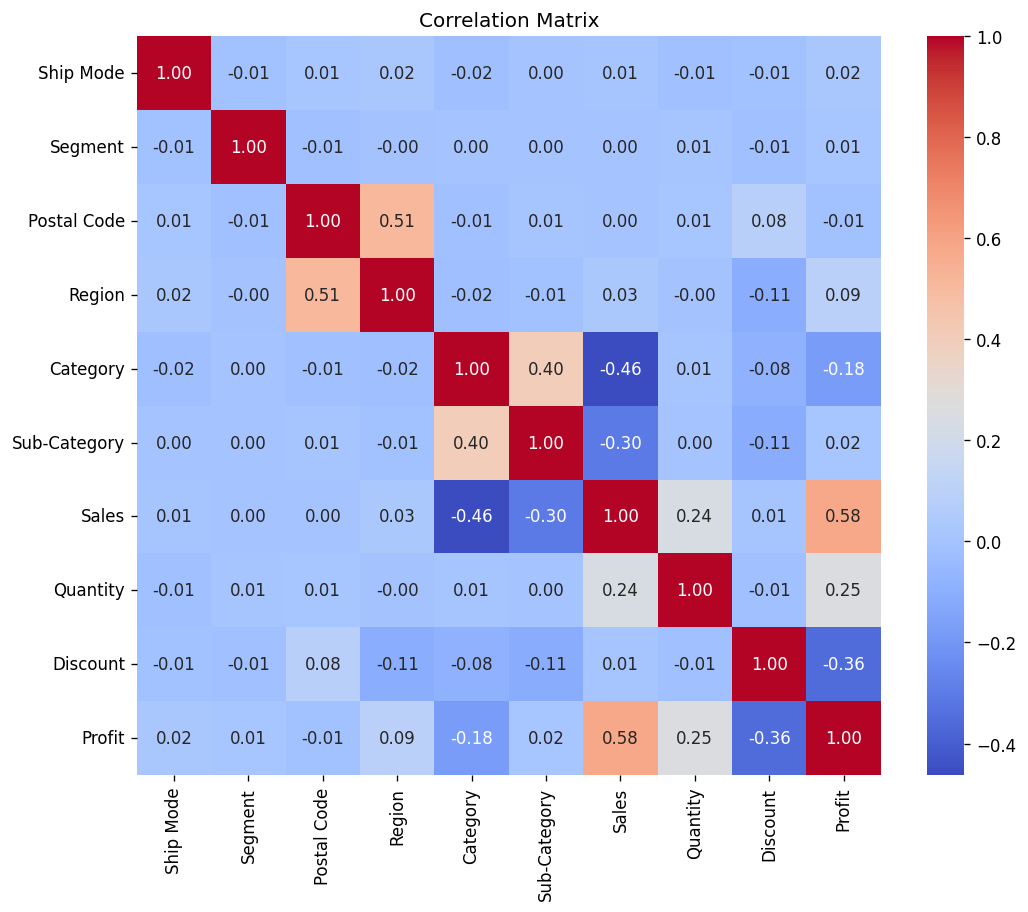

In [ ]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

selected_features = ['Quantity', 'Profit', 'Region', 'Discount', 'Category', 'Sub-Category', 'Ship Mode', 'Segment']
X = df[selected_features]
y = df['Sales']

# Train the models

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=42)

# Training models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_r, y_train_r)
y_pred_rf = random_forest_model.predict(X_test_r)

# Evaluating models

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'R-squared: {r2_linear:.2f}')

mse_rf = mean_squared_error(y_test_r, y_pred_rf)
r2_rf = r2_score(y_test_r, y_pred_rf)
print("\nRandom Forest:")
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')

Linear Regression:
Mean Squared Error: 2975.54
R-squared: 0.54

Random Forest:
Mean Squared Error: 1887.97
R-squared: 0.70


# Testing the models

In [ ]:
input_values = {
    'Quantity': 2,
    'Profit': 26.3760,
    'Region': 2,
    'Discount': 0.0,
    'Category': 2,
    'Sub-Category': 6,
    'Ship Mode': 2,
    'Segment': 1
}

input_df = pd.DataFrame([input_values])

linear_pred = linear_model.predict(input_df)
linear_precentage=linear_pred/199.98 *100
print(f'\nLinear Regression Sales Prediction: {linear_pred[0]:.2f}')
print(f'Linear Accuarcy: {linear_precentage[0]:.2f}%')

rf_pred = random_forest_model.predict(input_df)
rf_precentage=rf_pred/199.98 *100
print(f'\nRandom Forest Sales Prediction: {rf_pred[0]:.2f}')
print(f'Random Forest Accuarcy: {rf_precentage[0]:.2f}%')


Linear Regression Sales Prediction: 168.15
Linear Accuarcy: 84.08%

Random Forest Sales Prediction: 139.50
Random Forest Accuarcy: 69.76%


# Time series

In [ ]:
df.set_index('Order Date', inplace=True)

start_date = '2014-01-01'
end_date = '2018-1-1'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by month and year
monthly_sales = filtered_df['Sales'].resample('M').sum()

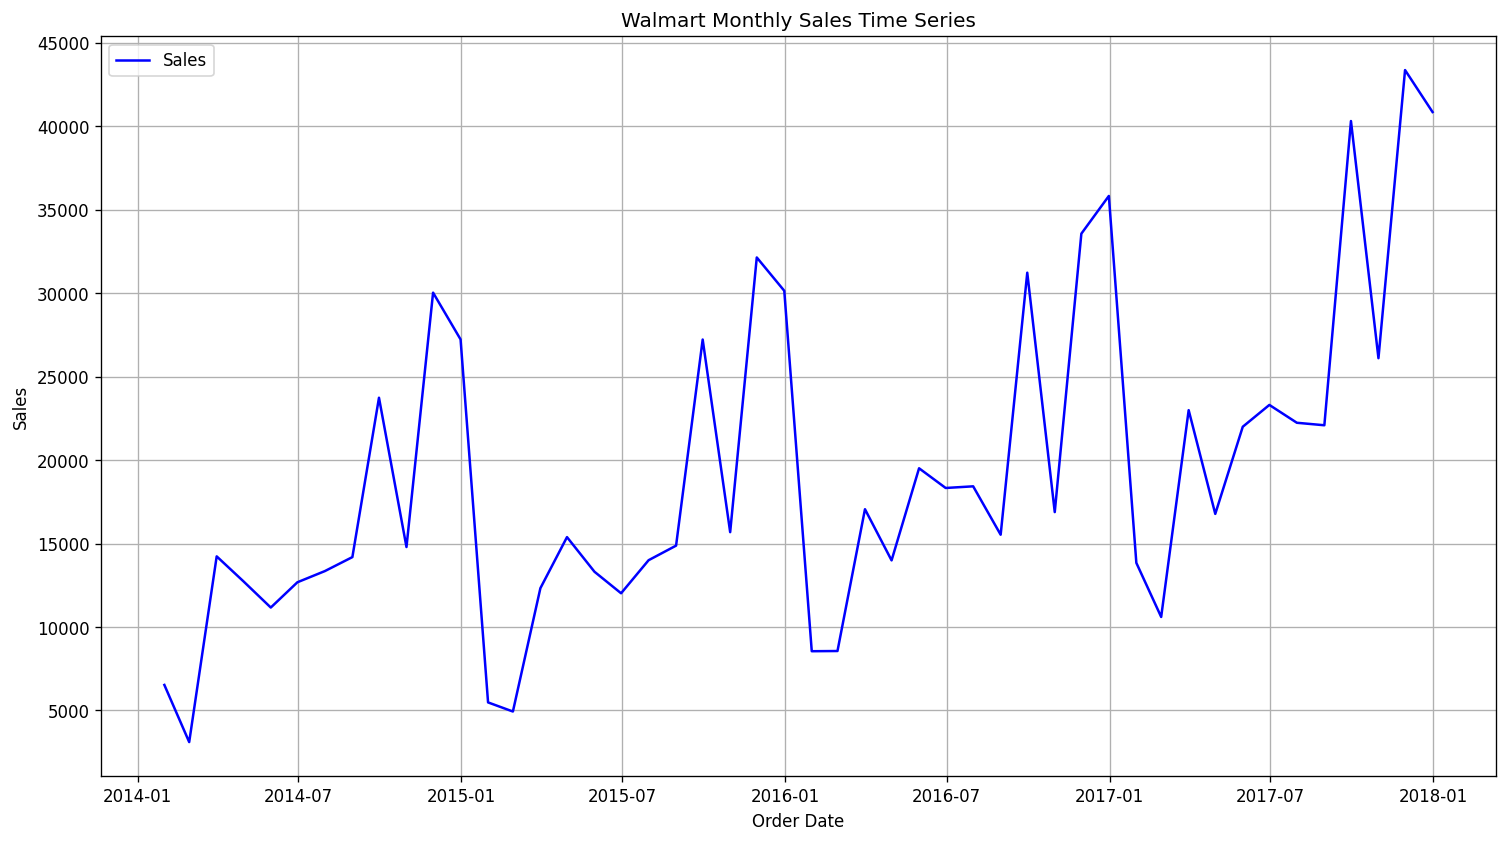

In [ ]:
# Plot the monthly sales
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales, label='Sales', color='blue')
plt.title('Walmart Monthly Sales Time Series')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

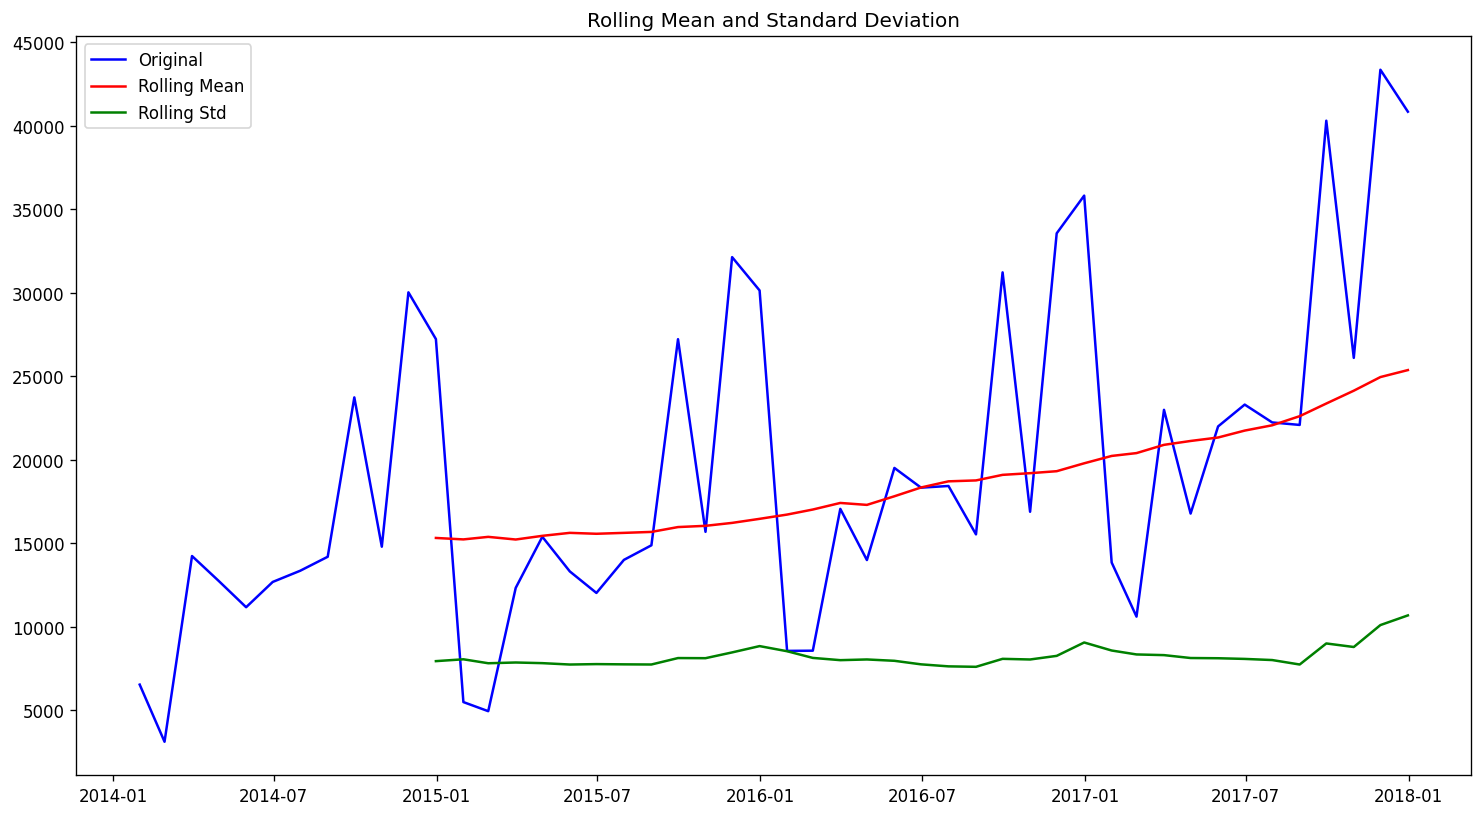

ADF Statistic: -3.8400591303226825
p-value: 0.0025230467435915062
Critical Values:
    1%: -3.5778480370438146
    5%: -2.925338105429433
    10%: -2.6007735310095064


In [ ]:
# Check stationarity and plot rolling statistics
def check_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    plt.figure(figsize=(15, 8))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value}')

check_stationarity(monthly_sales)

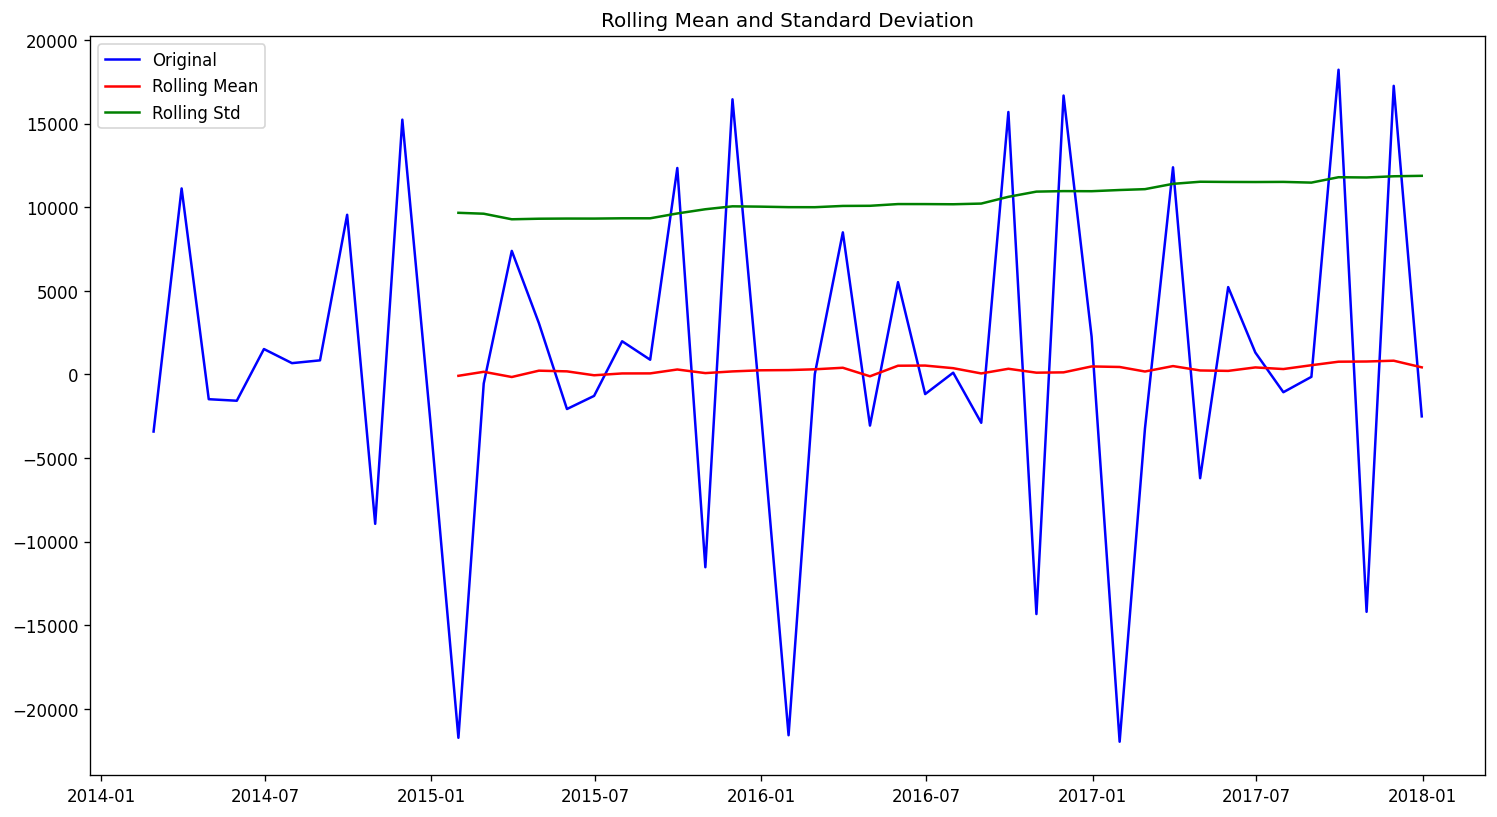

ADF Statistic: -16.234993685181315
p-value: 3.777847115917784e-29
Critical Values:
    1%: -3.626651907578875
    5%: -2.9459512825788754
    10%: -2.6116707716049383


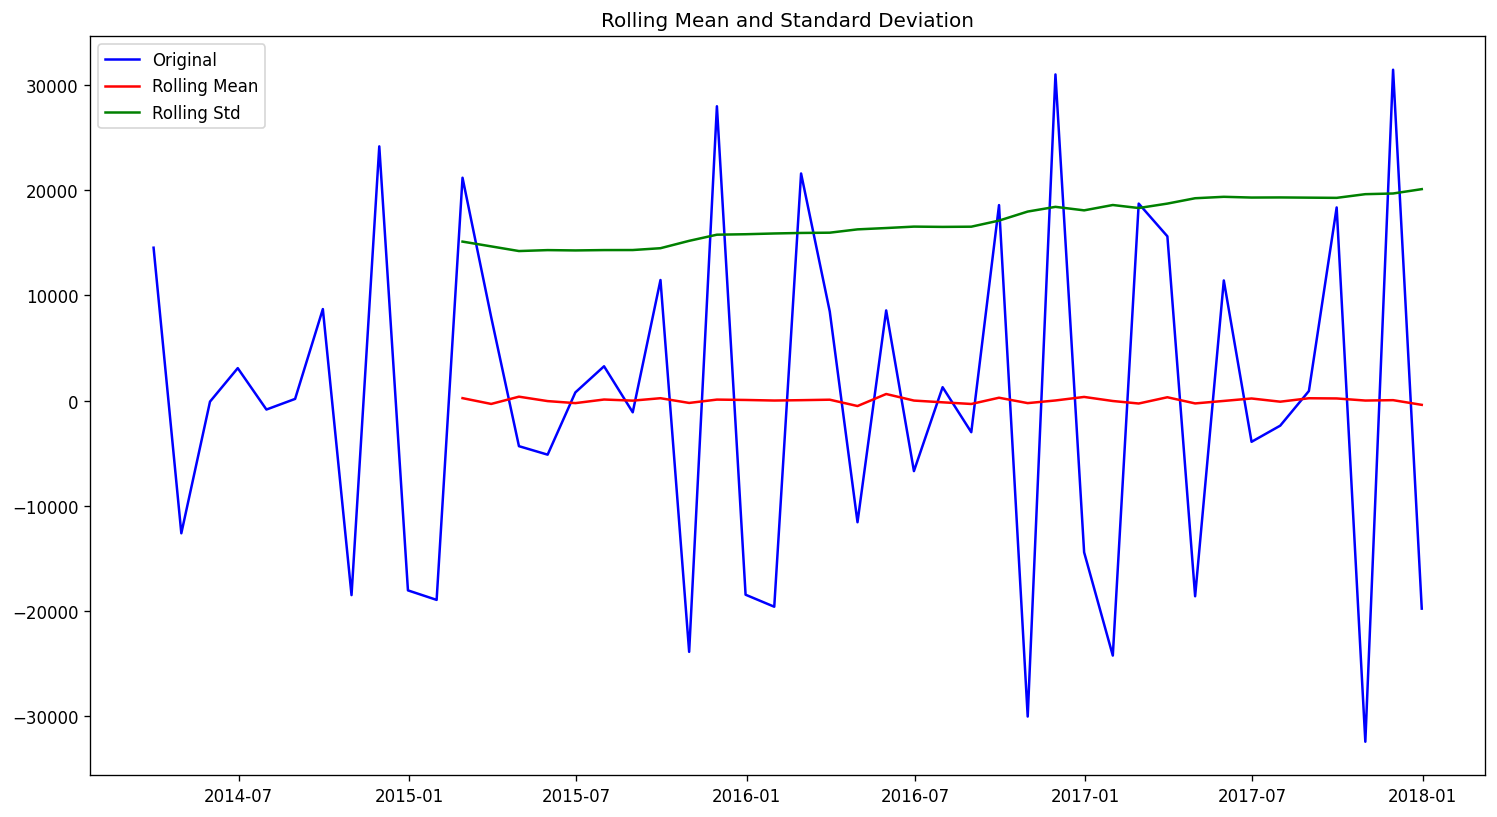

ADF Statistic: -11.873967581820338
p-value: 6.405586491903669e-22
Critical Values:
    1%: -3.6327426647230316
    5%: -2.9485102040816327
    10%: -2.6130173469387756


In [ ]:
# Differencing to make the series stationary
monthly_sales_diff = monthly_sales.diff().dropna()
check_stationarity(monthly_sales_diff)

monthly_sales_diff2 = monthly_sales_diff.diff().dropna()
check_stationarity(monthly_sales_diff2)

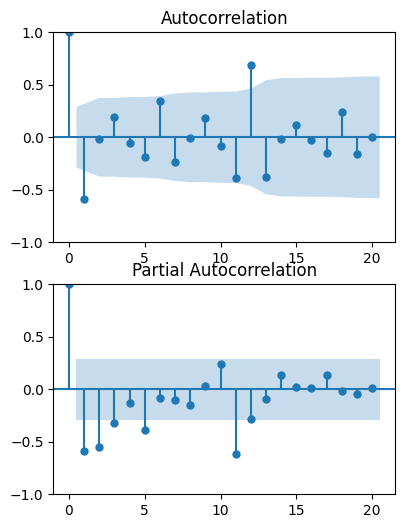

In [60]:
plt.figure(figsize=(15, 6))
plt.subplot(233)
plot_acf(monthly_sales_diff2, ax=plt.gca(), lags=20)
plt.subplot(236)
plot_pacf(monthly_sales_diff2, ax=plt.gca(), lags=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


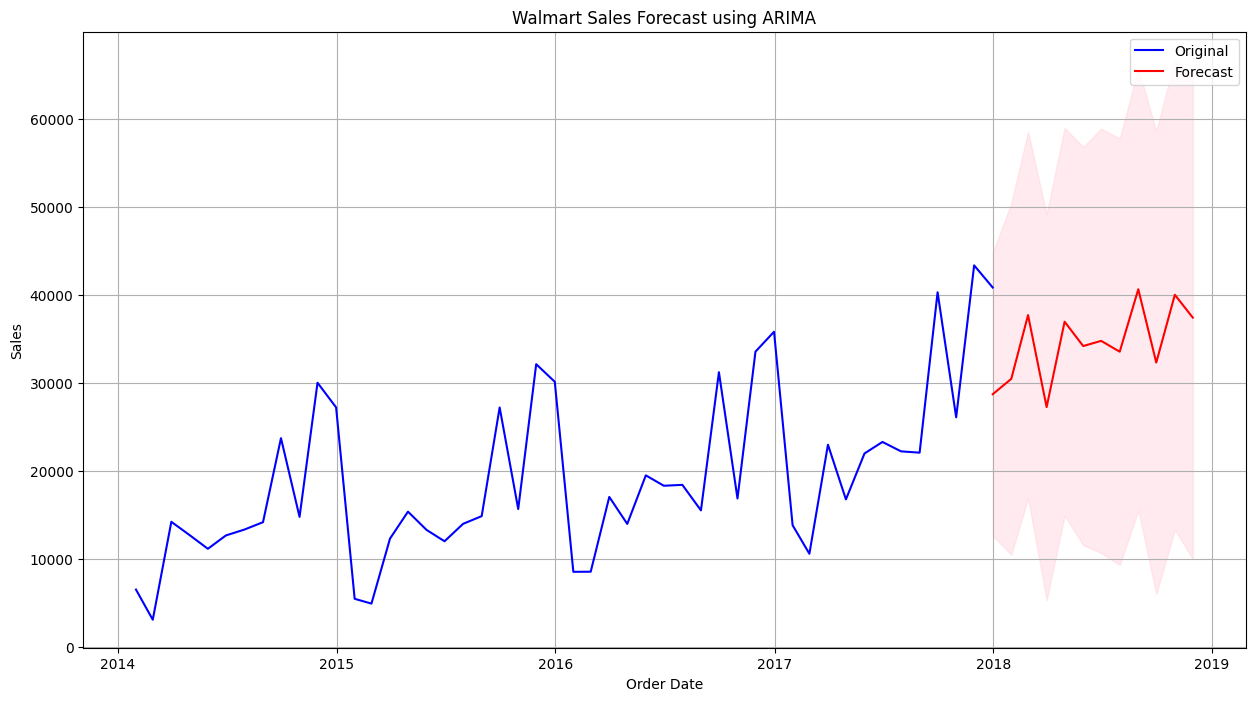

In [65]:
# Build and fit the ARIMA model
model = ARIMA(monthly_sales, order=(3, 2, 6))
arima_model = model.fit()

# Forecast the future values
forecast_steps = 12
forecast=arima_model.predict(start=len(monthly_sales), end=len(monthly_sales)+forecast_steps-1)
forecastMean = arima_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps, freq='M')
conf_int = forecastMean.conf_int()

# Plot the forecast
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales, label='Original', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Walmart Sales Forecast using ARIMA')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()